In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')




Monthly (CSV) Data set represents Average Price of Gold for each given month

In [7]:
df = pd.read_csv('monthly.csv')
df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [6]:
df.shape

(847, 2)

In [9]:
print(f"Date range of gold prices available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [10]:
date = pd.date_range (start='1/1/1950',end= '8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [11]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df = df.set_index('month')
df.head

<bound method NDFrame.head of                Price
month               
1950-01-31    34.730
1950-02-28    34.730
1950-03-31    34.730
1950-04-30    34.730
1950-05-31    34.730
...              ...
2020-03-31  1593.764
2020-04-30  1680.030
2020-05-31  1715.697
2020-06-30  1734.032
2020-07-31  1840.807

[847 rows x 1 columns]>

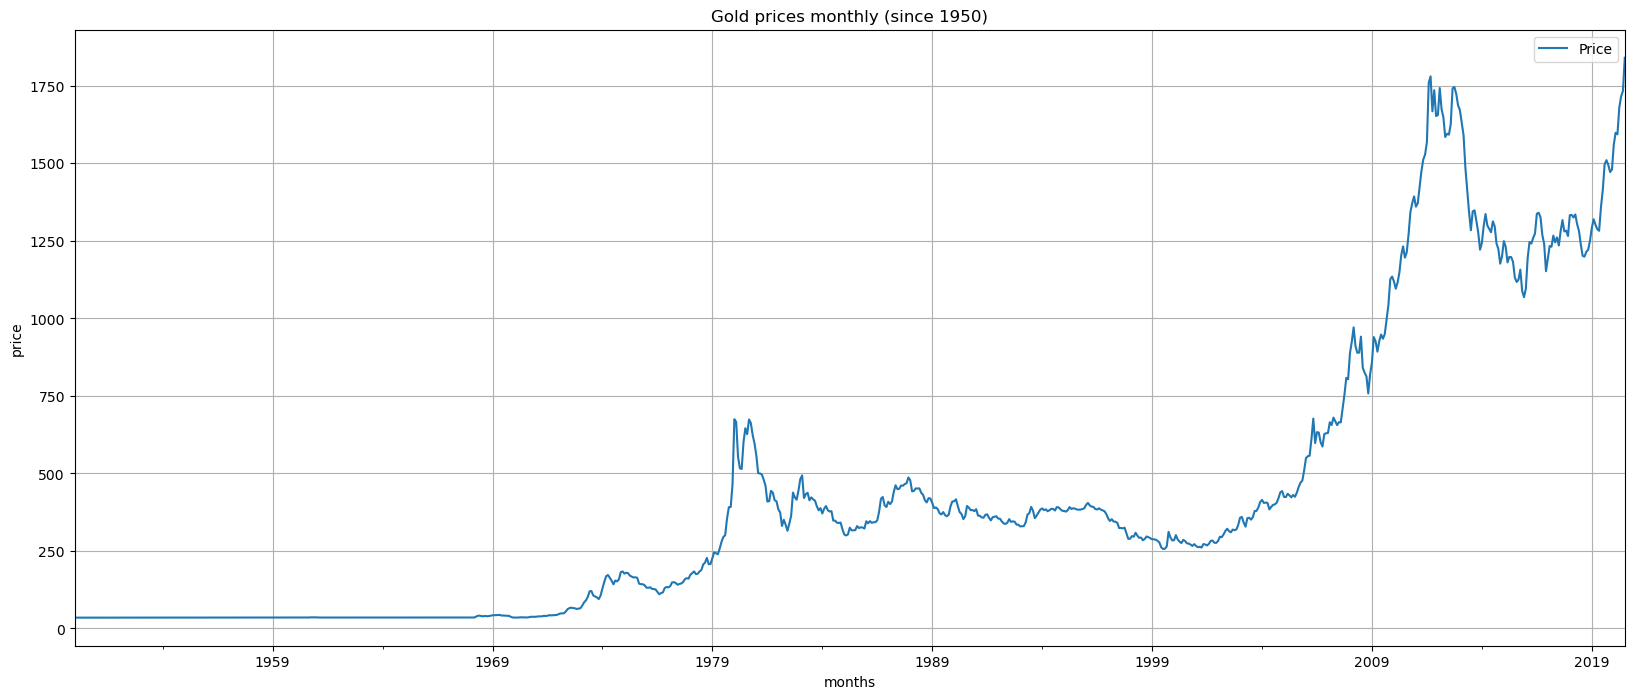

In [16]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly (since 1950)")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

In [17]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


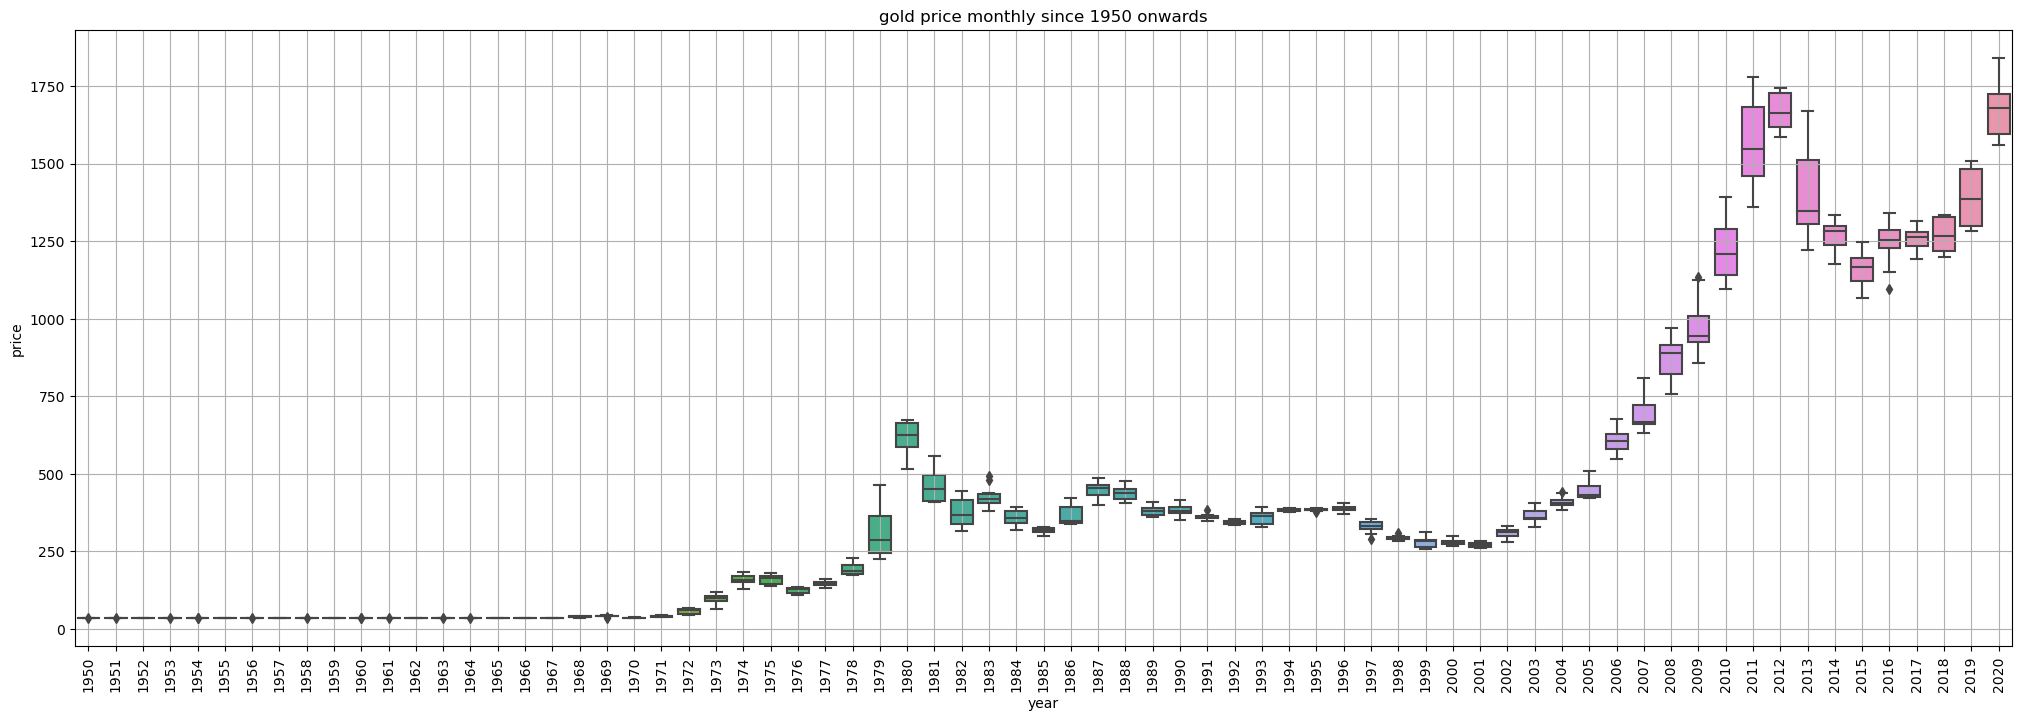

In [24]:
_, ax = plt.subplots(figsize = (25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()